In [2]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = 80

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
IDtest = data_test['Id']

In [4]:
data_train

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


In [4]:
# Numerical columns
num_col = data_train.select_dtypes(exclude=['object']).drop(['Id'], axis=1).columns

In [6]:
num_col

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')

In [8]:
cat_col = data_train.select_dtypes(include=['object']).columns
cat_col

Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')

In [9]:
# Describe data train
data_train[num_col].describe().round(decimals=2)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,4.01,4.41,4.32,4.37,2.01,3.36,5.42,5.15,5.45,5.49,3.26,5.30,5.08,1.42,1.39,1.94,1.04,1.94,4.91,4.55,2.27,2.23,3.42,1.37,1.21,1.47,1.15,3.22,3.14,2.73,1.94,2.53,1.14,2.49,2.03,2.21,1.12,4453532.61
std,2.91,1.51,1.03,1.02,1.21,2.13,2.30,1.86,1.83,1.85,1.91,1.94,1.04,2.73,2.40,3.51,2.03,3.30,5.60,3.71,2.05,1.23,4.56,2.30,2.13,2.61,2.07,2.31,1.68,5.54,3.51,5.23,1.70,5.17,3.44,4.17,1.79,2576071.60
min,1.00,1.00,0.00,3.00,1.00,1.00,1.00,1.00,4.00,4.00,1.00,2.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1149870.00
25%,2.00,4.00,4.00,4.00,1.00,2.00,5.00,4.00,4.00,5.00,2.00,4.00,5.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,2.00,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2999068.00
50%,3.00,5.00,4.00,4.00,2.00,3.00,5.00,5.00,5.00,5.00,3.00,5.00,5.00,0.00,0.00,0.00,0.00,0.00,3.00,4.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,2.50,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3939804.00
75%,4.00,5.00,5.00,5.00,2.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,2.00,2.00,3.00,1.00,4.00,5.00,5.00,3.00,3.00,5.00,2.00,2.00,2.50,2.00,4.00,3.00,4.00,3.00,3.00,2.00,3.00,4.00,3.00,2.00,5166635.00
max,12.00,7.50,7.50,7.50,8.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,7.50,15.00,10.00,15.00,15.00,12.00,25.00,15.00,15.00,5.00,25.00,10.00,10.00,12.50,12.50,12.50,7.50,25.00,15.00,25.00,6.00,24.00,15.00,20.00,8.00,19696939.00


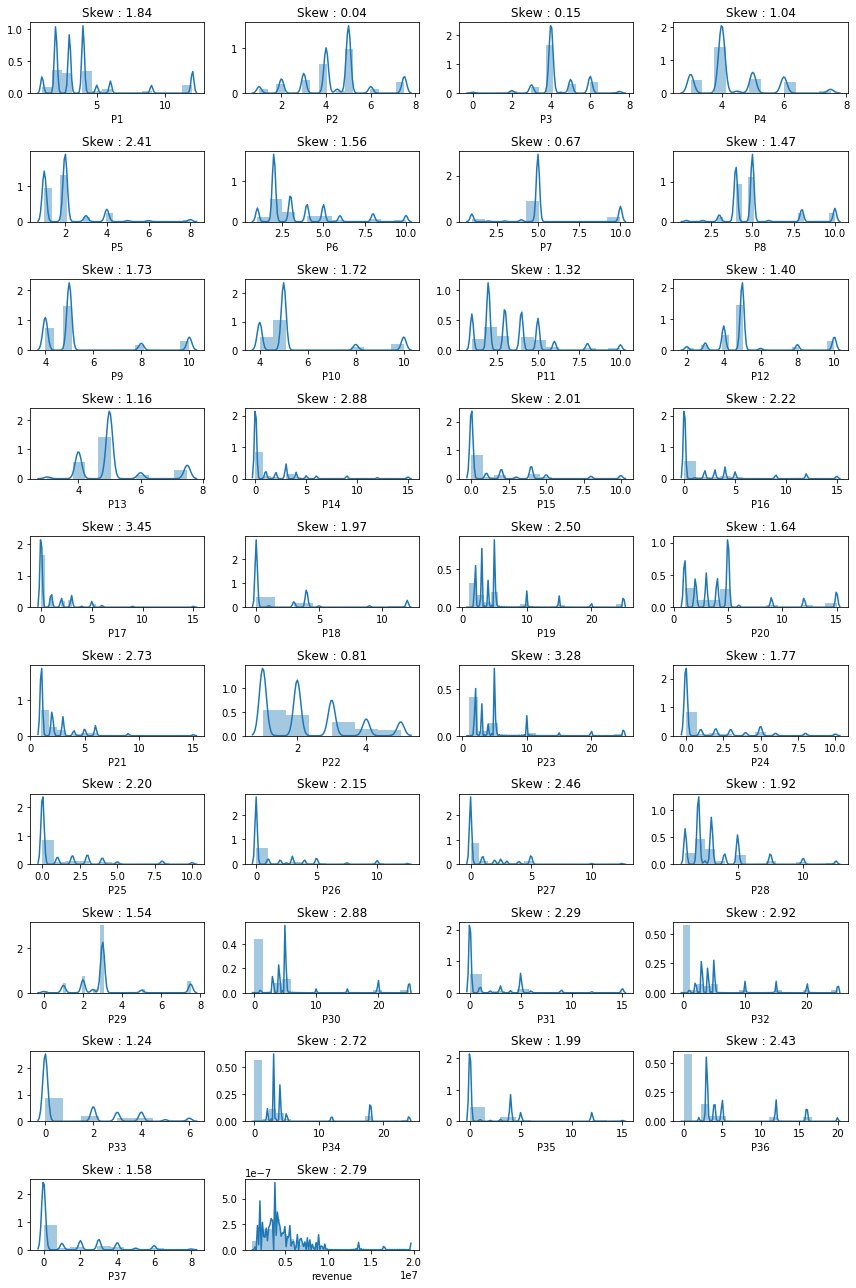

In [10]:
# Plot skew
fig = plt.figure(figsize=(12,18))
for i in range(len(num_col)):
    fig.add_subplot(10,4,i+1)
    sns.distplot(data_train[num_col[i]], kde_kws={'bw': 0.1})
    plt.title('Skew : %.2f' % data_train[num_col[i]].skew())
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Skew : 0.31')

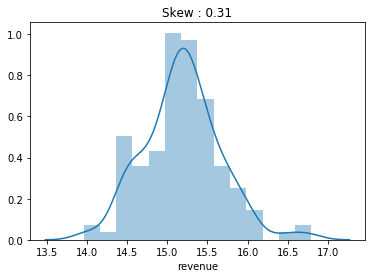

In [11]:
# Revenue with log
sns.distplot(np.log(data_train['revenue']))
plt.title('Skew : %.2f' % np.log(data_train['revenue']).skew())

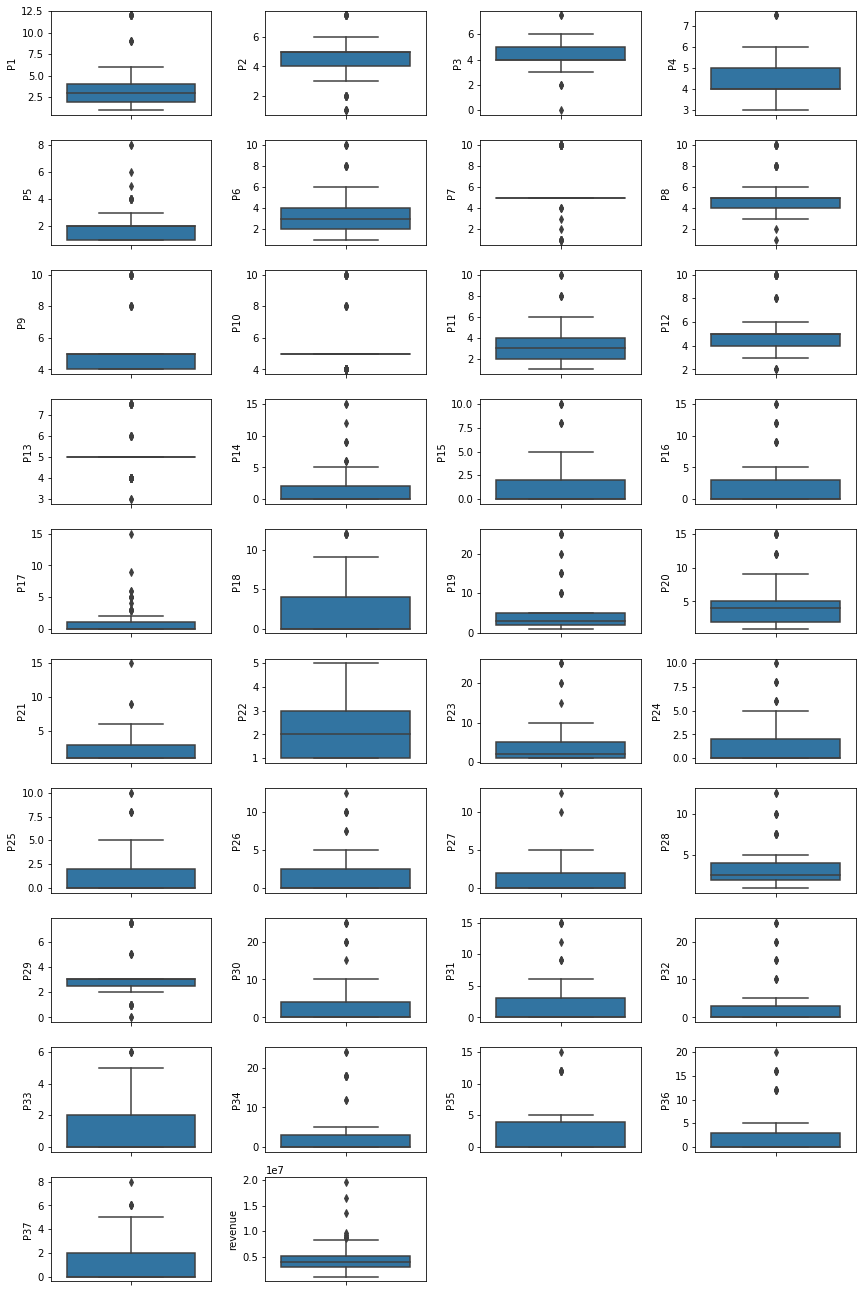

In [12]:
fig = plt.figure(figsize=(12,18))
for i in range(len(num_col)):
    fig.add_subplot(10,4,i+1)
    sns.boxplot(y=data_train[num_col[i]])
    
plt.tight_layout()
plt.show()

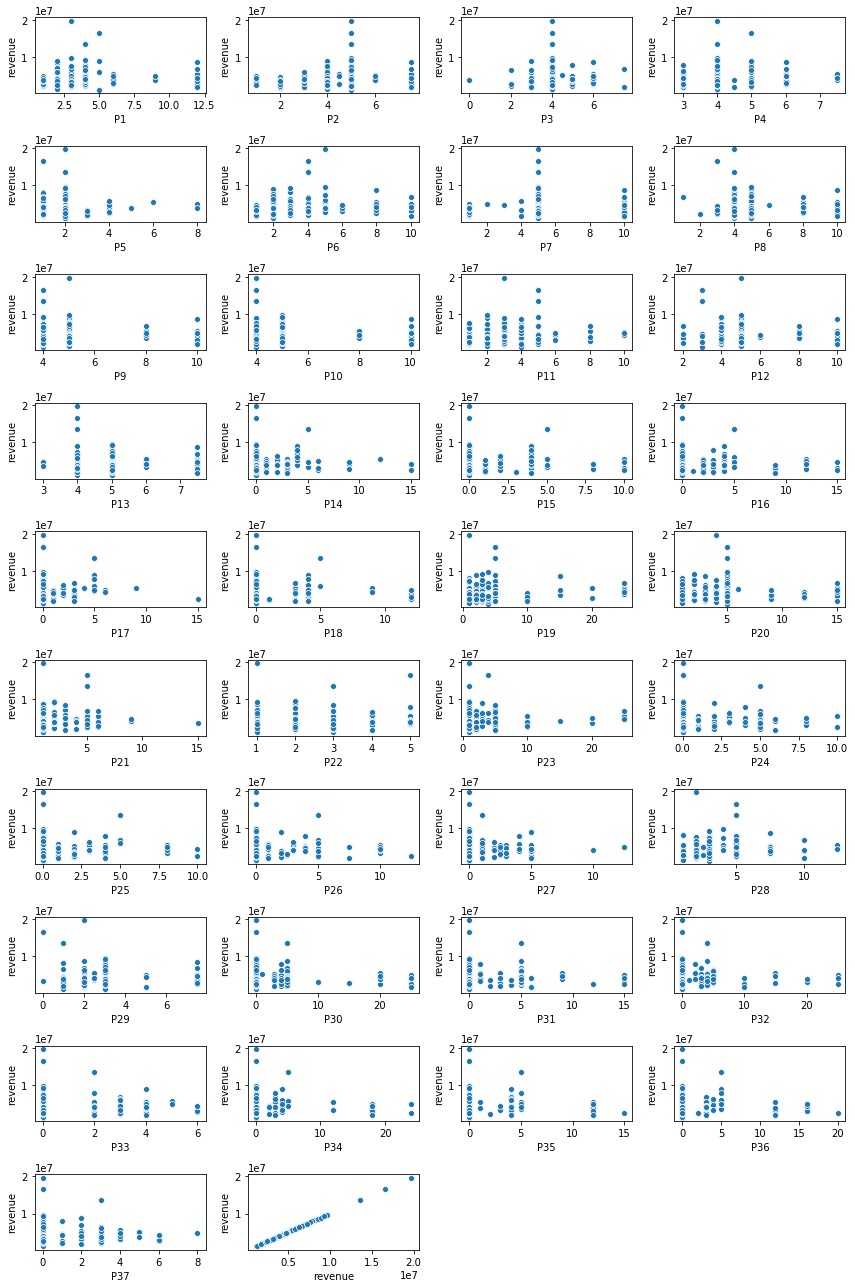

In [13]:
# Bivariate analysis - scatterplot
fig = plt.figure(figsize=(12,18))
for i in range(len(num_col)):
    fig.add_subplot(10,4,i+1)
    sns.scatterplot(data_train[num_col[i]], data_train['revenue'])
    
plt.tight_layout()
plt.show()

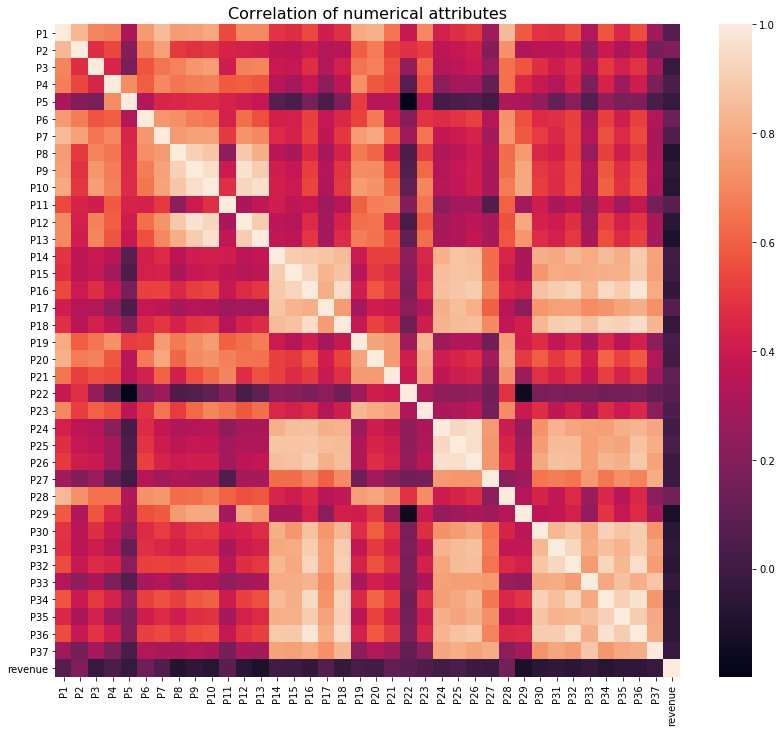

In [14]:
# Correlation
correlation = data_train[num_col].corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

In [15]:
correlation['revenue'].sort_values(ascending=False)

revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64

In [16]:
# Missing value
data_train.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [17]:
data_train[cat_col].describe()

,Open Date,City,City Group,Type
count,137,137,137,137
unique,134,34,2,3
top,02/02/2012,İstanbul,Big Cities,FC
freq,2,50,78,76


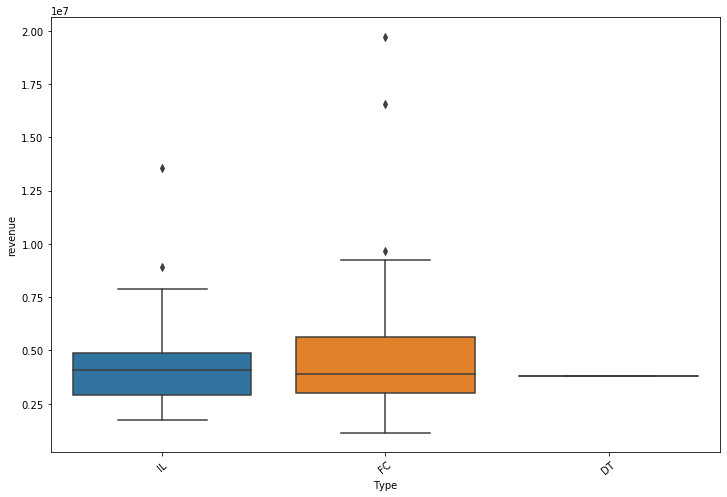

In [18]:
# Bivariate analysis - box plot
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=data_train['revenue'], x=data_train['Type'])
plt.xticks(rotation=40)
plt.show()

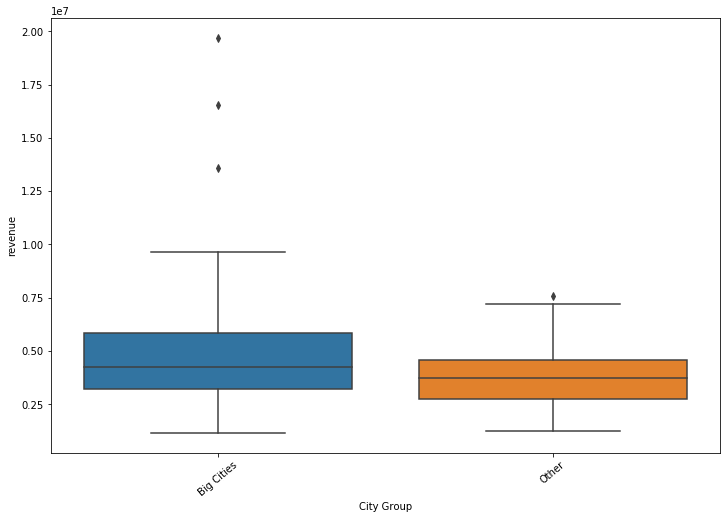

In [19]:
# Bivariate analysis - box plot
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=data_train['revenue'], x=data_train['City Group'])
plt.xticks(rotation=40)
plt.show()

In [20]:
# Transform Open date to age
from datetime import datetime

def count_years(open_date):
    date_parse = datetime.strptime(open_date, '%m/%d/%Y')
    date_now = datetime.now()
    return date_now.year - date_parse.year

In [21]:
open_years = []
for i in data_train['Open Date']:
    open_years.append(count_years(i))

df_open_years = pd.DataFrame({ 'open_years' : open_years } )
group_years = df_open_years['open_years'].value_counts()

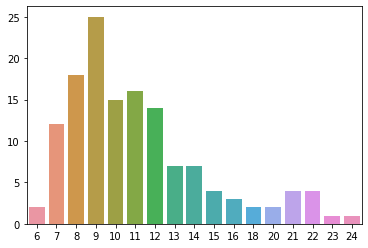

In [22]:
# Barplot open years
sns.barplot(x=group_years.index, y=group_years.values)

In [23]:
# City
city_most = data_train['City'].value_counts()[data_train['City'].value_counts() > 2].index

In [24]:
city_transform = []

for i in data_train['City']:
    if i in city_most:
        city_transform.append(i)
    else:
        city_transform.append('other')
        
df_city_transform = pd.DataFrame({ 'city_transform' : city_transform } )
group_city = df_city_transform['city_transform'].value_counts()

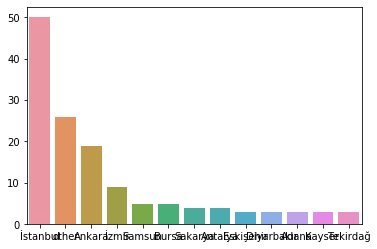

In [25]:
# Barplot cgroup city
sns.barplot(x=group_city.index, y=group_city.values)

In [26]:
data_train_copy = data_train.copy()
data_train_copy['revenue_log'] = np.log(data_train_copy['revenue'])

In [27]:
data_train_copy.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,revenue_log
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,15.547830
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,15.750379
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,14.535971
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,14.799651
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,15.278005


In [28]:
data_train_copy = data_train.copy()
data_train_copy['revenue_log'] = np.log(data_train_copy['revenue'])

In [29]:
data_train_copy.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,revenue_log
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,15.547830
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,15.750379
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,14.535971
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,14.799651
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,15.278005
